In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# 导入依赖
import warnings

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
data_location = "/home/ann/opt/iNeuralProphet/data/"
df = pd.read_csv(data_location + "air_passengers.csv")
df.tail(3)

,ds,y
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


# 1. 训练和测试模型

## 1.1 简单案例

In [3]:
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
m.set_plotting_backend("plotly-static")

df = pd.read_csv(data_location + "air_passengers.csv")
df_train, df_test = m.split_df(df=df, freq="MS", valid_p=0.2)

metrics_train = m.fit(df=df_train, freq="MS")
metrics_test = m.test(df=df_test)

metrics_test

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.009759394451975822
         MAE_val            19.574155807495117
        RMSE_val             23.81751251220703
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


,MAE_val,RMSE_val,Loss_test,RegLoss_test
0,19.574156,23.817513,0.009759,0.0


## 1.2 预测未来
在进行任何实际预测之前，请根据所有可用数据重新拟合模型，否则您将大大降低预测准确性

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

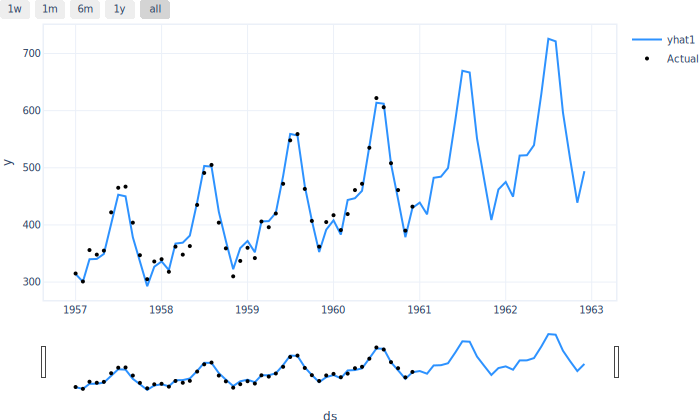

In [4]:
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
m.set_plotting_backend("plotly-static")
metrics_train2 = m.fit(df=df, freq="MS")
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=48)
forecast = m.predict(future)
m.plot(forecast)

## 1.3 可视化训练

In [1]:
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
m.set_plotting_backend("plotly-static")

df = pd.read_csv(data_location + "air_passengers.csv")
df_train, df_test = m.split_df(df=df, freq="MS", valid_p=0.2)

metrics = m.fit(df=df_train, freq="MS", validation_df=df_test, progress="plot")

NameError: name 'NeuralProphet' is not defined

# 2. 时间序列交叉验证

时间序列交叉验证是一种技术，也称为滚动源回测。它涉及将数据分成几个折叠。* 在第一次折叠期间，我们根据部分数据训练模型，然后评估其在下一组数据点上的性能，这些数据点由 fold_pct 参数（每个折叠中的样本百分比）决定。* 在下一个折叠中，我们将上一个折叠的评估数据包含在训练数据中，然后评估模型在后面一组数据点上的性能。* 重复此过程，直到最终折叠，评估数据到达可用数据的末尾。从本质上讲，当我们从一个折叠移动到下一个折叠时，预测原点会“滚动”向前移动。

In [6]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {"seasonality_mode": "multiplicative", "learning_rate": 0.1}

df = pd.read_csv(data_location + "air_passengers.csv")
folds = NeuralProphet(**params).crossvalidation_split_df(
    df, freq="MS", k=5, fold_pct=0.20, fold_overlap_pct=0.5
)

In [7]:
# 初始化空的 DataFrame
metrics_train = pd.DataFrame()
metrics_test = pd.DataFrame()

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    m.set_plotting_backend("plotly-static")
    train = m.fit(df=df_train, freq="MS")
    test = m.test(df=df_test)

    # 使用 pd.concat 而不是 append
    metrics_train = pd.concat(
        [metrics_train, train[METRICS].iloc[-1:]], ignore_index=True
    )
    metrics_test = pd.concat(
        [metrics_test, test[METRICS_VAL].iloc[-1:]], ignore_index=True
    )

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.03645528107881546
         MAE_val             16.65665054321289
        RMSE_val             20.41701316833496
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.07758527249097824
         MAE_val            31.965652465820312
        RMSE_val            34.658748626708984
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.030536387115716934
         MAE_val            20.915857315063477
        RMSE_val             28.28019905090332
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.02441093511879444
         MAE_val            26.201824188232422
        RMSE_val            30.491735458374023
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.009656466543674469
         MAE_val             19.37322998046875
        RMSE_val             23.69158935546875
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [8]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

,MAE_val,RMSE_val
mean,23.022643,27.507857
std,6.090304,5.600876
min,16.656651,20.417013
max,31.965652,34.658749


# 3. 三阶段训练、验证和测试程序

## 3.1 训练、验证和测试评估 示例

In [9]:
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
m.set_plotting_backend("plotly-static")

df = pd.read_csv(data_location + "air_passengers.csv")
# create a test holdout set:
df_train_val, df_test = m.split_df(df=df, freq="MS", valid_p=0.2)
# create a validation holdout set:
df_train, df_val = m.split_df(df=df_train_val, freq="MS", valid_p=0.2)

# fit a model on training data and evaluate on validation set.
metrics_train1 = m.fit(df=df_train, freq="MS")
metrics_val = m.test(df=df_val)

# refit model on training and validation data and evaluate on test set.
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
m.set_plotting_backend("plotly-static")
metrics_train2 = m.fit(df=df_train_val, freq="MS")
metrics_test = m.test(df=df_test)

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.01738835498690605
         MAE_val            18.184715270996094
        RMSE_val             25.14739227294922
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.00895937904715538
         MAE_val            18.754375457763672
        RMSE_val            22.820432662963867
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [10]:
import pandas as pd

# 为每个 DataFrame 添加 split 列并取最后一行（如果需要）
metrics_train1_tail = metrics_train1.tail(1).assign(split="train1")
metrics_train2_tail = metrics_train2.tail(1).assign(split="train2")
metrics_val_with_split = metrics_val.assign(split="validate")
metrics_test_with_split = metrics_test.assign(split="test")

# 合并所有 DataFrame
result = pd.concat(
    [
        metrics_train1_tail,
        metrics_train2_tail,
        metrics_val_with_split,
        metrics_test_with_split,
    ],
    ignore_index=True,
).drop(columns=["RegLoss"])
result

,train_loss,reg_loss,MAE,RMSE,Loss,epoch,split,MAE_val,RMSE_val,Loss_test,RegLoss_test
0,0.000844,0.0,5.332294,6.626822,0.000847,249.0,train1,NaN,NaN,NaN,NaN
1,0.000826,0.0,5.943982,7.284576,0.000751,229.0,train2,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,validate,18.184715,25.147392,0.017388,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,test,18.754375,22.820433,0.008959,0.0


## 3.2 训练、交叉验证和交叉测试评估 示例

In [11]:
METRICS = ["MAE", "RMSE"]
METRICS_VAL = ["MAE_val", "RMSE_val"]
params = {"seasonality_mode": "multiplicative", "learning_rate": 0.1}

df = pd.read_csv(data_location + "air_passengers.csv")
folds_val, folds_test = NeuralProphet(**params).double_crossvalidation_split_df(
    df, freq="MS", k=5, valid_pct=0.10, test_pct=0.10
)

In [12]:
# 初始化空的 DataFrame
metrics_train1 = pd.DataFrame(columns=METRICS)
metrics_val = pd.DataFrame(columns=METRICS_VAL)

for df_train1, df_val in folds_val:
    m = NeuralProphet(**params)
    m.set_plotting_backend("plotly-static")
    train1 = m.fit(df=df_train1, freq="MS")
    val = m.test(df=df_val)
    metrics_train1 = pd.concat(
        [metrics_train1, train1[METRICS].iloc[-1:]], ignore_index=True
    )
    metrics_val = pd.concat(
        [metrics_val, val[METRICS_VAL].iloc[-1:]], ignore_index=True
    )

# 同样处理第二组折叠
metrics_train2 = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS_VAL)

for df_train2, df_test in folds_test:
    m = NeuralProphet(**params)
    m.set_plotting_backend("plotly-static")
    train2 = m.fit(df=df_train2, freq="MS")
    test = m.test(df=df_test)
    metrics_train2 = pd.concat(
        [metrics_train2, train2[METRICS].iloc[-1:]], ignore_index=True
    )
    metrics_test = pd.concat(
        [metrics_test, test[METRICS_VAL].iloc[-1:]], ignore_index=True
    )

Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.0050252401269972324
         MAE_val            12.066864013671875
        RMSE_val             16.90963363647461
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.007547327317297459
         MAE_val             20.2611083984375
        RMSE_val            21.365617752075195
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.00430687703192234
         MAE_val            17.296432495117188
        RMSE_val            17.817415237426758
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.013257250189781189
         MAE_val             32.11598205566406
        RMSE_val            32.116310119628906
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.007102667354047298
         MAE_val            23.417037963867188
        RMSE_val            23.494625091552734
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.010476640425622463
         MAE_val             28.33489990234375
        RMSE_val            28.518524169921875
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test           0.00589935015887022
         MAE_val             18.22979736328125
        RMSE_val            21.388307571411133
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.0033813866320997477
         MAE_val              12.599853515625
        RMSE_val            16.384231567382812
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.005131118930876255
         MAE_val             17.70965576171875
        RMSE_val             20.47146224975586
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


Training: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Loss_test          0.0019650065805763006
         MAE_val            11.462814331054688
        RMSE_val            13.255661010742188
      RegLoss_test                  0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [13]:
metrics_train2.describe().loc[["mean", "std"]]

,MAE,RMSE
mean,7.565364,9.500850
std,0.157525,0.263358
